In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn import svm

from sklearn.metrics import classification_report, plot_confusion_matrix

In [2]:
data = pd.read_csv("cell_samples.csv")

In [3]:
data

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
data["BareNuc"].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [6]:
data["BareNuc"].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuc, dtype: int64

In [7]:
data["Class"].unique()

array([2, 4])

In [8]:
data["Class"].value_counts()

2    458
4    241
Name: Class, dtype: int64

#Preprocessing

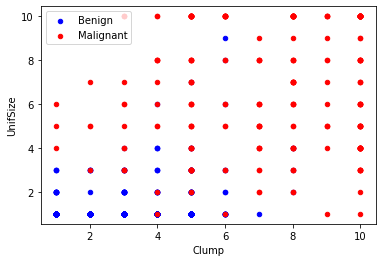

In [13]:
benign_df = data[data["Class"] == 2]
malignant_df = data[data["Class"] == 4]

axes = benign_df.plot(kind = 'scatter', x='Clump', y='UnifSize', color='blue', label='Benign')
malignant_df.plot(kind = 'scatter', x='Clump', y='UnifSize', color='red', label='Malignant', ax=axes)

In [30]:
def preprocess_inputs(df):
  df = df.copy()
  #drop unneccesary column
  df = df.drop("ID", axis=1)
  #convert object to numeric
  df = df[pd.to_numeric(data["BareNuc"], errors='coerce').notnull()] 
  df['BareNuc'] = df['BareNuc'].astype('int')

  #X and y
  X = df.drop('Class', axis=1)
  y = df['Class']

  #converting to arrays
  X = np.asarray(X)
  y = np.asarray(y)

  #split the data
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=4)



  return X_train, X_test, y_train, y_test

In [31]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [32]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

546
137
546
137


#Training

In [34]:
classifier = svm.SVC(kernel='linear', gamma='auto', C=2) #c= cost/penalty
model = classifier.fit(X_train, y_train)

#Evaluation

In [37]:
accuracy = model.score(X_test, y_test)
print(accuracy)

0.9635036496350365


In [38]:
y_pred = model.predict(X_test)

In [39]:
print(y_pred)

[2 4 2 4 2 2 2 2 4 2 2 4 4 4 4 2 2 2 2 2 4 2 4 4 4 4 2 2 4 4 4 2 4 2 2 2 4
 2 2 2 2 2 2 4 4 2 2 2 2 4 2 2 2 2 2 2 4 2 2 2 2 4 4 2 4 4 4 2 2 2 4 4 2 2
 2 4 2 2 4 4 2 2 2 2 4 4 2 4 2 2 4 4 2 2 2 4 2 2 2 4 2 4 2 2 4 2 4 2 2 4 2
 2 4 2 2 2 2 2 4 4 4 4 4 2 2 4 2 2 4 2 4 2 2 2 2 2 4]


In [40]:
clr = classification_report(y_test, y_pred)
print(clr)

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



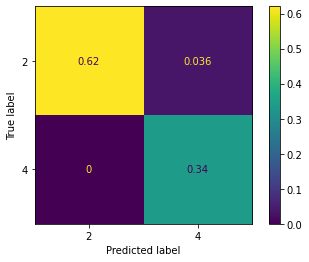

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
cmd.plot()